# File Analysis Toolbox

<table table style="float:left; border:none; background-color: #ffffff">
    <tr style="border:none; background-color: #ffffff">
       <td style="float: left">
           <a href="http://pyviz.org/tutorial/07_Geographic_Data.html">     
           <img src="img/l_bokeh.png" style="width:50px; align: left;"></a>    
       </td>
       <td style="float: left">
           <a href="https://geopandas.org">     
           <img src="img/l_geopandas.png" style="width:80px; align: left;"></a>    
       </td>
       <td style="border:none; float: left">
           <a href="https://pandas.pydata.org">     
           <img src="img/l_pandas.png" style="height:50px; align: left"></a>
       </td>
       <td style="border:none; float: left">
           <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html">
           <img src="img/l_excel.png" style="height:50px; align: center"></a>
       </td>
       <td style="border:none; float: left">
           <a href="https://www.mysql.com/products/connector/">
           <img src="img/l_mysql.png" style="height:50px; align: center"></a>    
       </td>
       <td style="border:none; float: left">
           <a href="https://3.python-requests.org">
           <img src="img/l_req.png" style="width:50px; align: left;"></a>
       </td>
    </tr>
</table>

In [29]:
import io
import sys
import numpy as np
import pandas as pd
import geopandas as gpd                                 # !{sys.executable} -m pip install geopandas
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))                              # set plot image sizes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import OrderedDict
import xlrd                                             #!{sys.executable} -m pip install xlrd
import IPython
import bokeh
from bokeh.io import output_notebook, output_file, show, push_notebook
from bokeh.plotting import *
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.layouts import row, column, gridplot, widgetbox
from bokeh.models.widgets import Tabs, Panel
from bokeh.transform import factor_cmap
import hvplot as hv
import hvplot.pandas
import pytz
import datetime
from uszipcode import SearchEngine                      # !{sys.executable} -m pip install uszipcode
search = SearchEngine(simple_zipcode=False)             # set simple_zipcode=False to use rich info database
#!pip3 install --upgrade uszipcode                      # upgrade databases
from progressbar import ProgressBar
!python3 --version
print("python:", sys.version)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("Geopandas:", gpd.__version__)
print("xlrd:", xlrd.__version__)
print("IPython:", IPython.__version__)
print("bokeh:", bokeh.__version__)
print("holoviews:", hv.__version__)
output_notebook()

python: 3.8.5 (default, Jul 21 2020, 10:48:26) 
[Clang 11.0.3 (clang-1103.0.32.62)]
Python 3.8.5
numpy: 1.19.1
pandas: 1.1.0
Geopandas: 0.8.1
xlrd: 1.2.0
IPython: 7.17.0
bokeh: 2.1.1
holoviews: 0.6.0


Loading BokehJS ...

In [114]:
df_at17 = pd.read_csv('data/8726724airTemp2017.csv', index_col='Date Time')
df_at18 = pd.read_csv('data/8726724airTemp2018.csv', index_col='Date Time')
df_at19 = pd.read_csv('data/8726724airTemp2019.csv', index_col='Date Time')
df_at20 = pd.read_csv('data/8726724airTemp2020.csv', index_col='Date Time')
df_wt17 = pd.read_csv('data/8726724waterTemp2017.csv', index_col='Date Time')
df_wt18 = pd.read_csv('data/8726724waterTemp2018.csv', index_col='Date Time')
df_wt19 = pd.read_csv('data/8726724waterTemp2019.csv', index_col='Date Time')
df_wt20 = pd.read_csv('data/8726724waterTemp2020.csv', index_col='Date Time')

df_Atemps = pd.concat([df_at17, df_at18, df_at19, df_at20])
df_Wtemps = pd.concat([df_wt17, df_wt18, df_wt19, df_wt20])
dfa = df_Atemps.drop(columns=[' X', ' N', ' R '])
dfw = df_Wtemps.drop(columns=[' X', ' N', ' R '])
dfa1 = dfa.dropna()
dfw1 = dfw.dropna()
dfa1.info()
dfw1.info()
dfa1.tail(100)
dfw1.tail(100)

<class 'pandas.core.frame.DataFrame'>
Index: 16114 entries, 2016-09-19 20:00 to 2020-08-16 22:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Air Temperature  16114 non-null  float64
dtypes: float64(1)
memory usage: 251.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 16977 entries, 2016-09-19 20:00 to 2020-08-16 22:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0    Water Temperature  16977 non-null  float64
dtypes: float64(1)
memory usage: 265.3+ KB


,Water Temperature
Date Time,
2020-08-12 19:00,92.1
2020-08-12 20:00,92.1
2020-08-12 21:00,92.1
2020-08-12 22:00,91.9
2020-08-12 23:00,91.8
...,...
2020-08-16 18:00,91.4
2020-08-16 19:00,91.4
2020-08-16 20:00,91.2


In [115]:
dfa1.head(100)

,Air Temperature
Date Time,
2016-09-19 20:00,83.8
2016-09-19 21:00,84.4
2016-09-19 22:00,84.2
2016-09-19 23:00,84.0
2016-09-20 00:00,82.9
...,...
2016-09-23 20:00,84.6
2016-09-23 21:00,84.9
2016-09-23 22:00,84.7


In [110]:
df.dtypes

 Air Temperature      float64
 Water Temperature    float64
dtype: object

/usr/local/Cellar/jupyterlab/2.2.4/libexec/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date Time'>

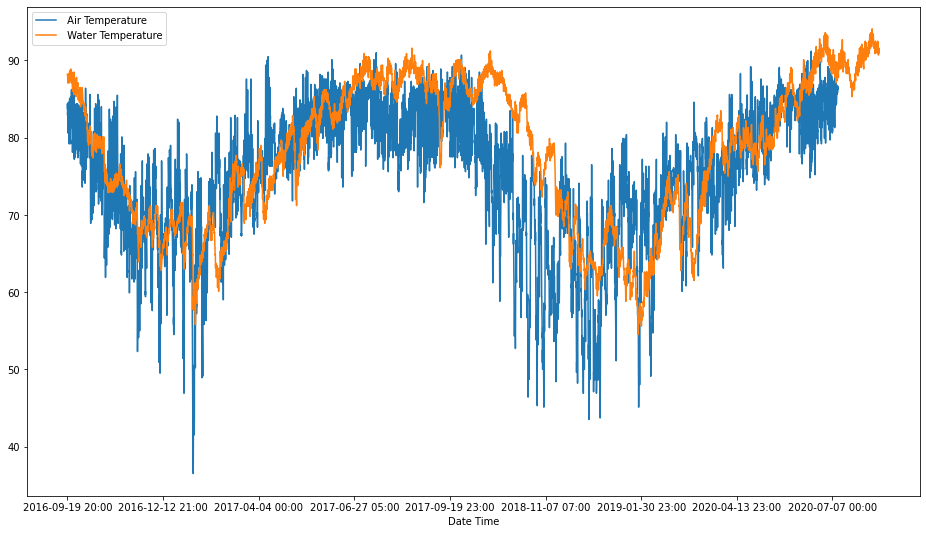

In [117]:
ax = dfa1.plot()                   # 2 dataframes same plot
dfw1.plot(ax=ax)

<a href="https://pandas.pydata.org"><img src="img/l_pandas.png" style="width:70px; float: left;"></a>    
<h1 style="padding-left:100px; border:none">DataFrame Methods</h1>

--------------------------------------  

```python
import pandas as pd                     
!{sys.executable} -m pip install pandas
```

### csv methods
```python
df = pd.read_csv('data/hosp.csv', index_col='Target?', dtype={'user_id': int})
with open('csvfile.csv', 'w') as csvfile: f = csv.writer(csvfile) f.writerows(items)   # write to csv file
```

### attributes
```python
pd.info()                               # data types and specs
pd.shape                                # dimensions (tuple)
pd.describe()                           # shows a quick statistic data summary
pd.dtypes                               # column labels & data types
pd.index                                # index (row labels)
pd.head(n)                              # return first n rows
pd.tail(n)                              # return last n rows    
pd.columns                              # column labels
pd.values                               # Numpy representation
pd.axes                                 # list axes
pd.size                                 # number (int) elements
pd.memory_usage([index, deep])          # each column memory (bytes)
```

### transforms
```python
pd.between_time(start_time, end_time)	# select range
pd.set_index()                          # set index using existing columns
pd.['col0'].astype(str)                 # change data type
df = pd.drop("del", axis=0)             # delete all rows with label "del"
df = pd.concat([df01, df02, df03])      # combine dataframes
pd.is_copy                              # return copy
pd.empty                                # empty
df = df0.drop(columns=[' X', ' N'])     # drop columns
df = df0.sort_values(by='column')       # sort
```

### [plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

```python
plt.figure(figsize=(16,9))
plt.rcParams["figure.figsize"] = [16,9]
df.plot.area([x, y])                    # stacked area plot
df.plot.bar([x, y])                     # vertical bar plot
df.plot.barh([x, y])                    # horizontal bar plot
df.plot.box([by])                       # box plot
df.boxplot([column, by, ax, …])         # box plot from columns
df.plot.hist([by, bins])                # histogram of columns
df.hist([column, by, grid, …])          # histogram
df.plot.line([x, y])                    # columns as lines
df.plot.pie([y])                        # pie plot
df.plot.scatter(x, y[, s, c])           # scatter plot
df.plot(legend=False)
df.plot(xlabel="new x", ylabel="new y")
ts.plot(logy=True)                      # log-scale
df['B'].plot(secondary_y=True, style='g') # secondary axis
df['A'].plot(x_compat=True)             # compa
df.plot.line()
with pd.plotting.plot_params.use('x_compat', True):
    df[' Air Temperature'].plot(color='b')
    df[' Water Temperature'].plot(color='g')
plt.rcParams["figure.figsize"] = [16,9]
dfa.plot.line()
dfw.plot.line()
```

### lookup()
Extract a set of values given a sequence of row labels and column labels return **NumPy array**

```python
DataFrame.lookup(list(range(0, 10, 2)), ['B', 'C', 'A', 'B', 'D'])
```

### query()

column b has values between column a and c values
```python
DataFrame.query('(a < b) & (b < c)')
index = pd.MultiIndex.from_arrays([colors, foods], names=['color', 'food'])
```

columns a and "b" have overlapping values
```python
DataFrame.query('a in b')
```

columns a and b have overlapping values and col c's values are less than col d's
```python
DataFrame.query('a in b and c < d')
```

Comparing a list of values to a column using ==/!= works similarly to in/not in.
```python
DataFrame.query('b == ["a", "b", "c"]')
```

select rows with index values 'Andrade' + 'Veness' with columns fr 'city' to 'email'  
```python
nDataFrame.loc[['Andrade', 'Veness'], 'city':'email']
```  
  
select same rows, with just 'first_name', 'address' and 'city' columns  
```python
DataFrame.loc['Andrade':'Veness', ['first_name', 'address', 'city']]
```  
  
select rows with _first name_ Antonio and _columns_ 'city' to 'email'  
  
```python
DataFrame.loc[DataFrame['first_name'] == 'Antonio', 'city':'email']
```  
  
Select rows where email column ends w/ 'hotmail.com' include all columns  
```python
DataFrame.loc[DataFrame['email'].str.endswith("hotmail.com")]
```  

--------------------------------------

<a href="https://geopandas.org"><img src="img/l_geopandas.png" style="width:80px; float: left;"></a>    
<h1 style="padding-left:100px; border:none">GeoPandas Methods</h1>

--------------------------------------

```python
import geopandas as gpd                                 # !{sys.executable} -m pip install geopandas
geo_df = geopandas.read_file("data/maps/usgeojson/gz_2010_us_040_00_5m.json")
geo_df.head()
geo_df = gpd.read_file("data/maps/states_21basic/states.shp")
geo_df["STATE_FIPS"] = geo_df["STATE_FIPS"].astype(np.int64)
geo_df.head()
geo_df.dtypes
geo_df.plot()
df = pd.read_csv("data/uspop-nst-2018.csv", header=0)
df = df[['STATE_FIPS','POP_2018']]
merged = geo_df.join(df.set_index("STATE_FIPS"), on="STATE_FIPS")
merged.head()
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
merged.plot(column='POP_2018',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by State (m)",
                        'orientation': "horizontal"})
merged.plot(column='POP_2018');
cax = divider.append_axes("right", size="5%", pad=0.1)
merged.plot(column='POP_2018', ax=ax, legend=True, cax=cax)

fig.savefig("leaddistribution.png", dpi=300)
```
--------------------------------------

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html"><img src="img/l_excel.png" style="width:70px; float: left;"></a>    
<h1 style="padding-left:125px; border:none">Excel Methods</h1> 

--------------------------------------  
```python  
$ !pip install xlrd
import xlrd
xlsx = pd.ExcelFile('examples/ex1.xlsx')
df = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
df.to_excel('examples/ex2.xlsx')
df.to_excel(writer, 'Sheet1')
writer.save()
!rm examples/ex2.xlsx
```
--------------------------------------

<a href="https://www.mysql.com/products/connector/"><img src="img/l_mysql.png" style="width:100px; float: left;"></a>    
<h1 style="padding-left:125px; border:none">MySQL Methods</h1>
  
--------------------------------------  
```python
!pip install mysql-connector-python
import mysql.connector
config = {
    'host': 'rpsmithii.mysql.pythonanywhere-services.com',
    'database': 'rpsmithii$weight','user': 'rpsmithii',
    'password': 'Home@Call4','port': '3306'}
db = mysql.connector.connect(**config)
cur = db.cursor()
cur.execute("SELECT dt, wht FROM weight WHERE wht > 10")
table = pd.DataFrame(cur.fetchall())
table.columns = cur.column_names
```
--------------------------------------  


<h1 style="border:none">Zipcode Methods</h1>
  
----------------------------------
  
```python
from uszipcode import SearchEngine               # !{sys.executable} -m pip install uszipcode
search = SearchEngine(simple_zipcode=False)      # set simple_zipcode=False to use rich info database
#!pip3 install --upgrade uszipcode               # upgrade databases
search = SearchEngine(simple_zipcode=True)       # False uses rich info database
zipcode = search.by_zipcode("06916")
# zipcode.to_json()                              # to json
zipcode.to_dict()                                # to dict
# zip = zipcode.values()                         # to list
zipcode
```
----------------------------------

In [ ]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}